In [3]:
#import necessary libraries
from pathlib import Path
import warnings
import re
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import cv2
import time
import os
import numpy as np
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
#variables to easily perform iterations
image_size_to_load=128
image_size_to_train=(512,512)
#we will store all the results in each iteration in a 
results={}
training_times={}

In [5]:
vis_path='visualizations/{}'.format(image_size_to_train[0])
Path(vis_path).mkdir(parents=True, exist_ok=True)

In [6]:
dataset_path="wild_animals_images"
image_paths=[]
labels=[]
for path in Path(dataset_path).glob(r'**/*.png'):
    if str(image_size_to_load) in str(path.parent.name):
        image_paths.append(path)
        labels.append(path.parent.parent.name)
print("Number of images found:", len(image_paths))

Number of images found: 1724


In [7]:
#remove -resize-\d\d\d from labels list 
labels = [re.sub(r'-resize-\d\d\d', '', label) for label in labels]

In [8]:
#print number of unique labels and their names

unique_labels = set(labels)
print("Number of unique labels:", len(unique_labels))
print("Unique labels:", unique_labels)
number_of_classes=len(unique_labels)

Number of unique labels: 6
Unique labels: {'tiger', 'lion', 'wolf', 'fox', 'cheetah', 'hyena'}


In [9]:
#convert labels to numbers using LabelEncoder
le = LabelEncoder()
le.fit(labels)
labels = le.transform(labels)

In [10]:
#get labels names
labels_to_names = dict(zip(le.transform(le.classes_), le.classes_))
print("Labels to names:", labels_to_names)

Labels to names: {0: 'cheetah', 1: 'fox', 2: 'hyena', 3: 'lion', 4: 'tiger', 5: 'wolf'}


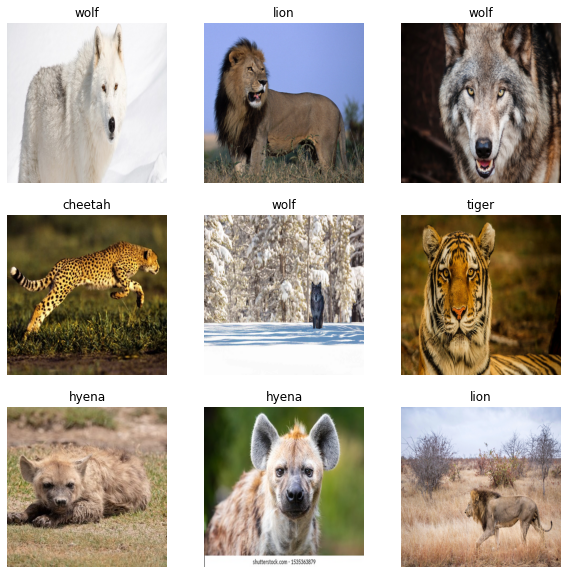

In [11]:
#randomly visualzie 9 images along with their lables to check if everything is done correctly
#every time you re run this cell you will get different images
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    random_index = random.randint(0, len(image_paths))
    img = mpimg.imread(image_paths[random_index])
    ax.imshow(img)
    ax.set_title(labels_to_names[labels[random_index]])
    ax.axis('off')


In [12]:
#now split the data into train and test sets in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

In [13]:
#now we will create a function to load the images and resize them to 224x224

def process_images(paths,labels,resize=(128,128),flatten=True,verbose=True):
    X=[]
    y=[]
    for i,path in enumerate(paths):
        if verbose and i%100==0:
            print("Processing image number:",i)
        try:
            img=cv2.imread(str(path))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,resize)
            X.append(img)
            y.append(labels[i])
        except:
            print("Error processing image:",path)
    X=np.array(X)
    if flatten:
        X=X.reshape(X.shape[0],-1)
    return X,y

In [14]:
#now we will load the train and test images
print("Loading Training Images into memory")
X_train,y_train=process_images(X_train,y_train,resize=image_size_to_train,flatten=True,verbose=False)
print("Loading Test Images into memory")
X_test,y_test=process_images(X_test,y_test,resize=image_size_to_train,flatten=True,verbose=False)

Loading Training Images into memory
Loading Test Images into memory
Error processing image: wild_animals_images\hyena-resize-512\resize-512\00000224_512resized.png


In [15]:
print("Number of images corrupted during loading:",len(image_paths)-len(X_train)-len(X_test))

Number of images corrupted during loading: 1


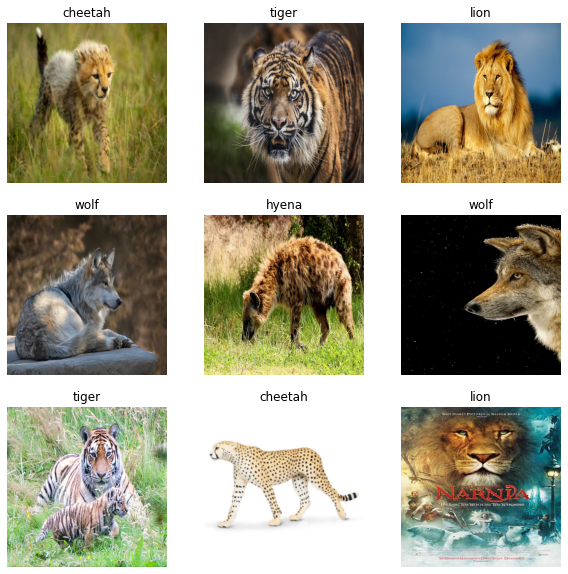

In [16]:
#visualize the resized images again
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    random_index = random.randint(0, len(X_train))
    img = X_train[random_index].reshape(image_size_to_train[0],image_size_to_train[1],3)
    ax.imshow(img)
    ax.set_title(labels_to_names[y_train[random_index]])
    ax.axis('off')


In [104]:
#now we will use the KNN classifier to classify the images
knn=KNeighborsClassifier(n_neighbors=5)
start_time=time.time()
knn.fit(X_train,y_train)
end_time=time.time()
training_times['KNN']=end_time-start_time
y_pred=knn.predict(X_test)
results['KNN']=accuracy_score(y_test,y_pred)
print("Accuracy:",results['KNN'])

Accuracy: 0.26453488372093026


In [105]:
#now we will use the SVM classifier to classify the images
svm=SVC()
start_time=time.time()
svm.fit(X_train,y_train)
end_time=time.time()
training_times['SVM']=end_time-start_time
y_pred=svm.predict(X_test)
results['SVM']=accuracy_score(y_test,y_pred)
print("Accuracy:",results['SVM'])

Accuracy: 0.4069767441860465


In [106]:
#now we will use the Random Forest classifier to classify the images
rf=RandomForestClassifier()
start_time=time.time()
rf.fit(X_train,y_train)
end_time=time.time()
training_times['Random Forest']=end_time-start_time
y_pred=rf.predict(X_test)
results['Random Forest']=accuracy_score(y_test,y_pred)
print("Accuracy:",results['Random Forest'])

Accuracy: 0.4011627906976744


In [107]:
#now we will use the Logistic Regression classifier to classify the images
lr=LogisticRegression(max_iter=1000)
start_time=time.time()
lr.fit(X_train,y_train)
end_time=time.time()
training_times['Logistic Regression']=end_time-start_time
y_pred=lr.predict(X_test)
results['Logistic Regression']=accuracy_score(y_test,y_pred)
print("Accuracy:",results['Logistic Regression'])

Accuracy: 0.36046511627906974


In [108]:
#now we will use the Decision Tree classifier to classify the images
dt=DecisionTreeClassifier()
start_time=time.time()
dt.fit(X_train,y_train)
end_time=time.time()
training_times['Decision Tree']=end_time-start_time
y_pred=dt.predict(X_test)
results['Decision Tree']=accuracy_score(y_test,y_pred)
print("Accuracy:",results['Decision Tree'])

Accuracy: 0.3081395348837209


In [109]:
#now we will use the Naive Bayes classifier to classify the images
nb=GaussianNB()
start_time=time.time()
nb.fit(X_train,y_train)
end_time=time.time()
training_times['Naive Bayes']=end_time-start_time
y_pred=nb.predict(X_test)
results['Naive Bayes']=accuracy_score(y_test,y_pred)
print("Accuracy:",results['Naive Bayes'])

Accuracy: 0.3226744186046512


In [17]:
#now build cnn network to classify the images

#reshape the images to 128x128x3
X_train=X_train.reshape(X_train.shape[0],image_size_to_train[0],image_size_to_train[1],3)
X_test=X_test.reshape(X_test.shape[0],image_size_to_train[0],image_size_to_train[1],3)

#convert the labels to categorical
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [18]:
# #build the model
def create_base_model(number_of_classes,image_size_to_train):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=(image_size_to_train[0],image_size_to_train[1],3)),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(64,3,activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(128,3,activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(256,3,activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(number_of_classes,activation='sigmoid'),
    ])
    return model

def create_effnv2_model(number_of_classes,image_size_to_train):
    pretrained = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False,weights='imagenet',input_shape=[*image_size_to_train,3])
    x = pretrained.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(512, activation = tf.keras.layers.LeakyReLU(alpha=0.2))(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(128, activation = tf.keras.layers.LeakyReLU(alpha=0.2))(x)
    outputs = tf.keras.layers.Dense(number_of_classes,activation="sigmoid", dtype='float32')(x)
    model = tf.keras.Model(pretrained.input, outputs)
    return model

In [19]:
metric = "val_categorical_accuracy"
def create_callbacks(metric = metric,filename="base_model.h5",patience=5):
    Path("models").mkdir(parents=True, exist_ok=True)
    cpk_path="models/"+filename
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=cpk_path,
        monitor= metric,
        mode='auto',
        save_best_only=True,
        verbose=1,
    )
    earlystop = tf.keras.callbacks.EarlyStopping(
        monitor= metric,
        mode='auto',
        patience=patience, 
        verbose=1
    )
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor= metric,
        mode='auto',
        patience=patience//2,
        verbose=1,
        factor=0.5
    )
    callbacks=[checkpoint,earlystop,reduce_lr]
    return callbacks

In [20]:
def compile_model(model, lr):
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    loss = tf.keras.losses.CategoricalCrossentropy()
    model.compile(optimizer=optimizer, loss=loss,metrics='categorical_accuracy')
    return model

In [ ]:
tf.keras.backend.clear_session()
with tf.device('/device:GPU:1'):
    base_model=create_base_model(number_of_classes,image_size_to_train)
    base_model=compile_model(base_model,lr=0.0001)
    callbacks=create_callbacks(metric=metric,filename="base_model.h5",patience=5)
    start_time=time.time()
    base_history=base_model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=callbacks,batch_size=1)
    end_time=time.time()
    training_times['Vanilla_CNN']=end_time-start_time

In [ ]:
#test the model
y_pred=base_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
ytest=np.argmax(y_test,axis=1)
results['Vanilla_CNN']=accuracy_score(ytest,y_pred)
print("Accuracy:",results['Vanilla_CNN'])

11/11 [==============================] - 0s 19ms/step
Accuracy: 0.5901162790697675


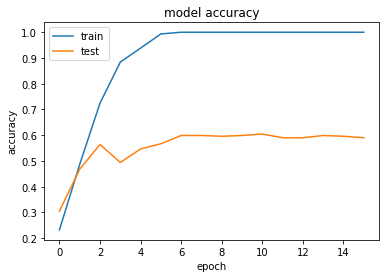

In [ ]:
#plot accuracies and losses of base model
plt.plot(base_history.history['categorical_accuracy'])
plt.plot(base_history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(vis_path+'/base_model_accuracy.png')
plt.show()

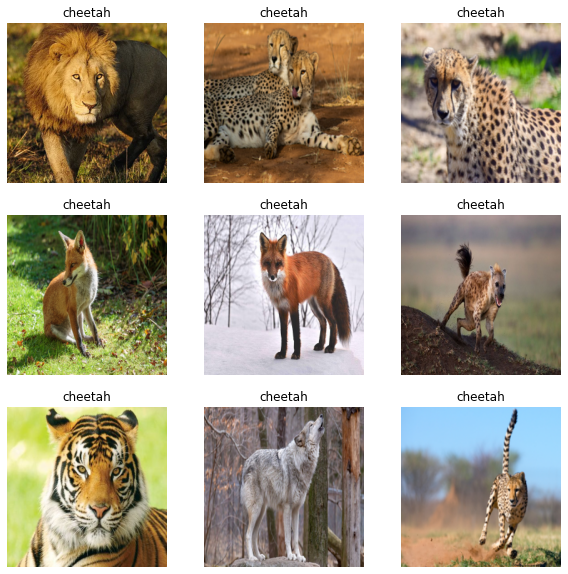

In [ ]:
#visualize the predictions using base model
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    random_index = random.randint(0, len(X_test))
    img = X_test[random_index].reshape(image_size_to_train[0],image_size_to_train[1],3)
    ax.imshow(img)
    ax.set_title(labels_to_names[np.argmax(y_pred[random_index])])
    ax.axis('off')

In [ ]:
#train the model using efficientnetv2
tf.keras.backend.clear_session()
with tf.device('/device:GPU:0'):
    effn_model=create_effnv2_model(number_of_classes,image_size_to_train)
    effn_model = compile_model(effn_model, lr=0.001)
    callbacks = create_callbacks(filename="effnv2_model.h5")
    start_time=time.time() 
    effn_history = effn_model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=callbacks,batch_size=8)
    end_time=time.time()
    training_times['EfficientNetV2']=end_time-start_time

Epoch 1/100
173/173 [==============================] - ETA: 0s - loss: 0.8134 - categorical_accuracy: 0.7846
Epoch 1: val_categorical_accuracy improved from -inf to 0.91860, saving model to models\effnv2_model.h5
173/173 [==============================] - 30s 98ms/step - loss: 0.8134 - categorical_accuracy: 0.7846 - val_loss: 0.2308 - val_categorical_accuracy: 0.9186 - lr: 0.0010
Epoch 2/100
173/173 [==============================] - ETA: 0s - loss: 0.5114 - categorical_accuracy: 0.8484
Epoch 2: val_categorical_accuracy improved from 0.91860 to 0.92442, saving model to models\effnv2_model.h5
173/173 [==============================] - 14s 80ms/step - loss: 0.5114 - categorical_accuracy: 0.8484 - val_loss: 0.2399 - val_categorical_accuracy: 0.9244 - lr: 0.0010
Epoch 3/100
172/173 [============================>.] - ETA: 0s - loss: 0.3612 - categorical_accuracy: 0.8888
Epoch 3: val_categorical_accuracy improved from 0.92442 to 0.93605, saving model to models\effnv2_model.h5
173/173 [======

In [ ]:
#test the model
y_pred=effn_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
results['EfficientNetV2']=accuracy_score(y_test,y_pred)
print("Accuracy:",results['EfficientNetV2'])

11/11 [==============================] - 2s 59ms/step
Accuracy: 0.9854651162790697


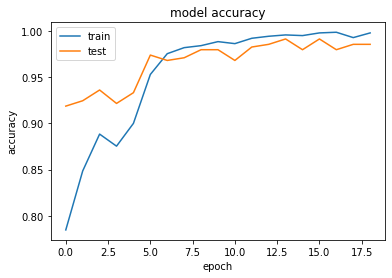

In [ ]:
#plot accuracies and losses of EfficientNetV2 model

plt.plot(effn_history.history['categorical_accuracy'])
plt.plot(effn_history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(vis_path+'/effnv2_model_accuracy.png')
plt.show()

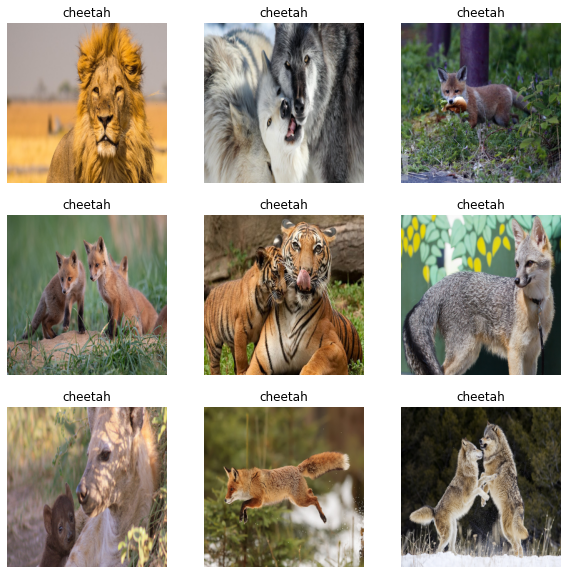

In [ ]:
#visualize the predictions using EfficientNetV2 model

fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    random_index = random.randint(0, len(X_test))
    img = X_test[random_index].reshape(image_size_to_train[0],image_size_to_train[1],3)
    ax.imshow(img)
    ax.set_title(labels_to_names[np.argmax(y_pred[random_index])])
    ax.axis('off')

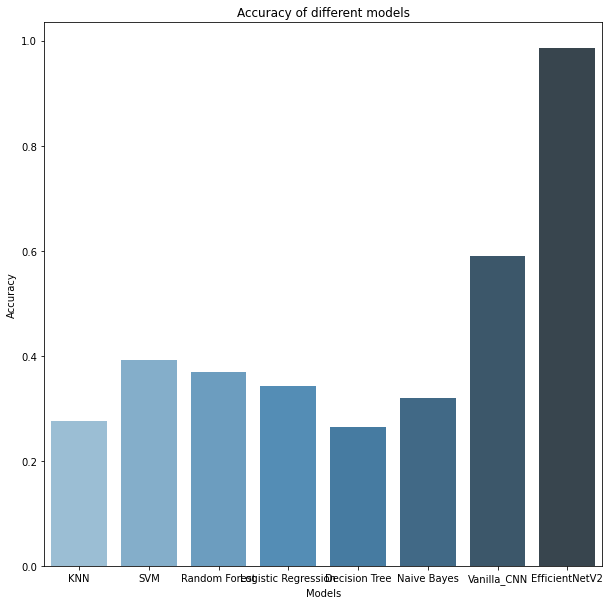

In [ ]:
#bar plot of all accuracies
fig=plt.figure(figsize=(10,10))
sns.barplot(x=list(results.keys()),y=list(results.values()),palette="Blues_d")
plt.title("Accuracy of different models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.savefig(vis_path+'/accuracy.png')
plt.show()

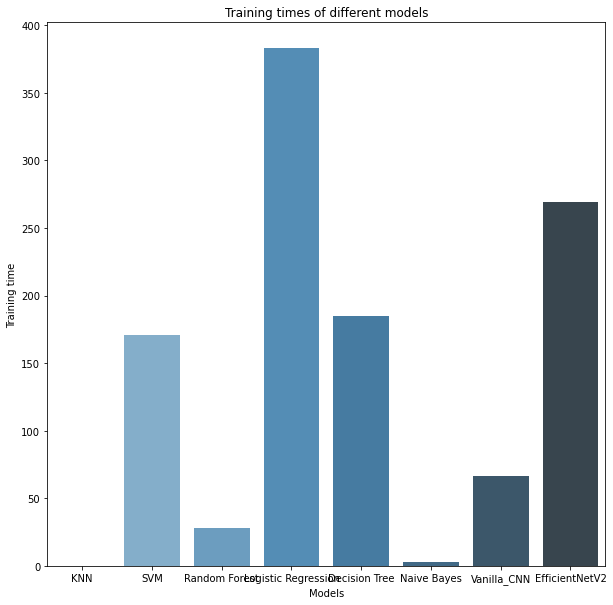

In [ ]:
#bar plot of different training times
fig=plt.figure(figsize=(10,10))
sns.barplot(x=list(training_times.keys()),y=list(training_times.values()),palette="Blues_d")
plt.title("Training times of different models")
plt.xlabel("Models")
plt.ylabel("Training time")
plt.savefig(vis_path+'/training_times.png')
plt.show()


In [ ]:
#save the results
#create a temporary dataframe

temp_df=pd.DataFrame.from_dict(results,orient='index',columns=['Accuracy'])
#add image size column to the dataframe
temp_df['Image_Size']=image_size_to_train[0]
#reset the index and rename the index column to model
temp_df=temp_df.reset_index().rename(columns={'index':'Model'})

#check for results.csv file, if exists then append to results.csv else create a new file

if os.path.exists('results.csv'):
    df=pd.read_csv('results.csv')
    df=df.append(temp_df,ignore_index=True)
    df.to_csv('results.csv',index=False)
else:
    temp_df.to_csv('results.csv',index=False)

In [ ]:
#save the training times
#create a temporary dataframe

temp_df=pd.DataFrame.from_dict(training_times,orient='index',columns=['Training_Time'])
#add image size column to the dataframe
temp_df['Image_Size']=image_size_to_train[0]
#reset the index and rename the index column to model
temp_df=temp_df.reset_index().rename(columns={'index':'Model'})

#check for training_times.csv file, if exists then append to training_times.csv else create a new file

if os.path.exists('training_times.csv'):
    df=pd.read_csv('training_times.csv')
    df=df.append(temp_df,ignore_index=True)
    df.to_csv('training_times.csv',index=False)
else:
    temp_df.to_csv('training_times.csv',index=False)


### Visualize the experiments done

Run the following cell only after series of experiments are done. This will plot the results of all the experiments done.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read the results.csv file
df=pd.read_csv('results.csv')
df.head()

,Model,Accuracy,Image_Size
0,KNN,0.273256,128
1,SVM,0.389535,128
2,Random Forest,0.380814,128
3,Logistic Regression,0.354651,128
4,Decision Tree,0.273256,128


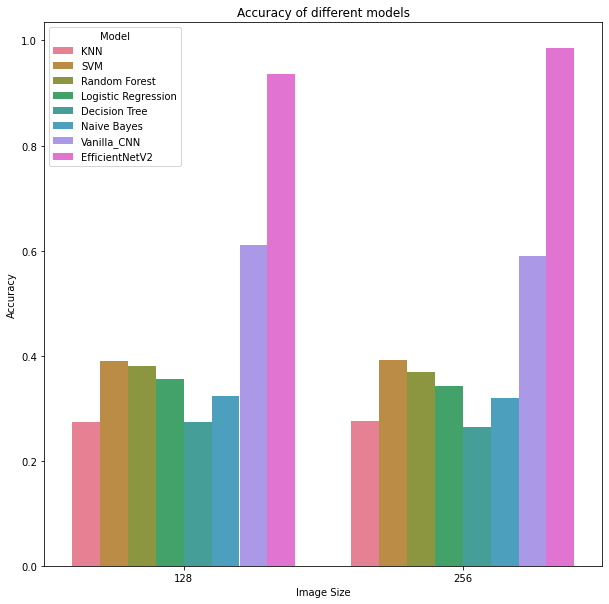

In [50]:
#group bar plot

fig=plt.figure(figsize=(10,10))
sns.barplot(x='Image_Size',y='Accuracy',hue='Model',data=df,palette="husl")
plt.title("Accuracy of different models")
plt.xlabel("Image Size")
plt.ylabel("Accuracy")
plt.savefig('group_accuracy.png')
plt.show()

In [45]:
#read the training_times.csv file

df=pd.read_csv('training_times.csv')
df.head()

,Model,Training_Time,Image_Size
0,KNN,0.000996,128
1,SVM,52.751567,128
2,Random Forest,14.227532,128
3,Logistic Regression,122.515772,128
4,Decision Tree,46.320359,128


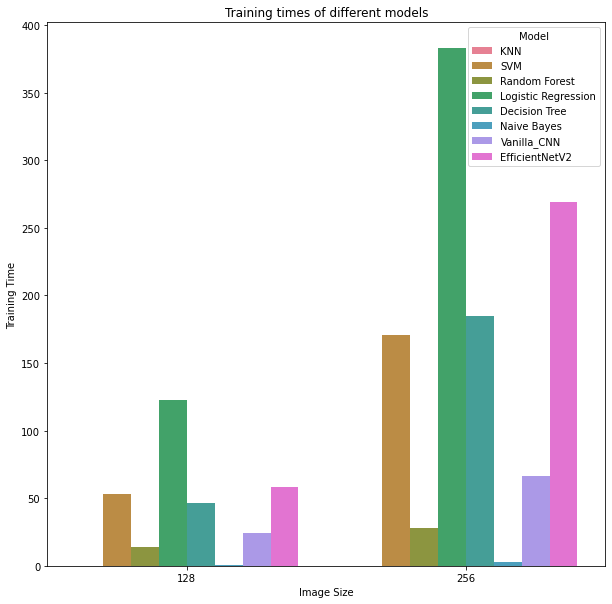

In [47]:
#group bar plot

fig=plt.figure(figsize=(10,10))
sns.barplot(x='Image_Size',y='Training_Time',hue='Model',data=df,palette="husl")
plt.title("Training times of different models")
plt.xlabel("Image Size")
plt.ylabel("Training Time")
plt.savefig('group_training_times.png')
plt.show()
